# MILESTONE 1

## Nama     : Bagus Diaz Pratama   
## Batch    : RMT - 009  



Link Tableau Public:
1. Dashboard 1: https://public.tableau.com/app/profile/bagus.pratama6355/viz/Book1_17580351642360/Dashboard1?publish=yes
2. Dashboard 2: https://public.tableau.com/app/profile/bagus.pratama6355/viz/Book1_17580351642360/Dashboard2?publish=yes

Dataset yang saya pakai: https://www.kaggle.com/datasets/rameezmeerasahib/electric-vehicle-ev-sales-and-adoption  

Latar Belakang:  
Perkembangan kendaraan listrik (Electric Vehicle/EV) semakin pesat seiring meningkatnya kesadaran masyarakat terhadap isu lingkungan, efisiensi energi, dan transisi menuju energi terbarukan. Produsen otomotif berlomba menghadirkan model EV dengan spesifikasi dan harga yang beragam untuk menarik minat konsumen, sehingga data penjualan EV menjadi menarik untuk dianalisis.  
Meski penjualan EV menunjukkan tren positif, adopsinya di berbagai wilayah masih menghadapi tantangan seperti keterbatasan infrastruktur, perbedaan daya beli konsumen, dan variasi preferensi terhadap fitur seperti kapasitas baterai, harga, maupun kecepatan pengisian. Oleh karena itu, dataset EV Sales and Adoption dari Kaggle dapat dimanfaatkan untuk menganalisis pola penjualan, mengidentifikasi faktor yang memengaruhi adopsi, serta memberikan rekomendasi strategis bagi produsen dan pembuat kebijakan.

Problem Statement (Metode SMART):  
- Specific: Menganalisis faktor-faktor yang memengaruhi adopsi kendaraan listrik (EV) di berbagai wilayah dengan fokus pada tren penjualan, merek, segmen pelanggan, kapasitas baterai, diskon harga, dan fitur fast charging.
- Measurable: Mengukur tren penjualan bulanan/tahunan, perbandingan jumlah unit terjual per merek, distribusi penjualan berdasarkan segmen pelanggan, serta menghitung nilai rata-rata, median, minimum, maksimum, dan variasi penjualan serta revenue per wilayah. Serta menguji secara statistik pengaruh diskon harga terhadap jumlah unit terjual.
- Achievable: Analisis dilakukan menggunakan dataset EV Sales and Adoption dari Kaggle yang mencakup variabel penjualan, wilayah, merek, segmen pelanggan, kapasitas baterai, diskon harga, dan opsi fast charging, sehingga tujuan analisis realistis untuk dicapai dengan metode visualisasi dan uji statistik.
- Relevant: Hasil analisis akan memberikan gambaran tren adopsi EV, faktor pendorong dan penghambat, serta memberikan rekomendasi yang relevan bagi produsen otomotif dan pembuat kebijakan dalam mempercepat adopsi kendaraan listrik.
- Time Bound: Analisis difokuskan pada periode data penjualan EV yang tersedia (tahun 2023), dengan target penyelesaian laporan analisis dalam kurun waktu penelitian (1 minggu).

Penjabaran Masalah:  
1. Bagaimana tren penjualan kendaraan listrik dari waktu ke waktu (bulanan/tahunan) di berbagai wilayah?  
2. Bagaimana perbandingan jumlah unit terjual berdasarkan merek kendaraan listrik?  
3. Bagaimana distribusi penjualan berdasarkan segmen pelanggan?  
4. Apakah terdapat perbedaan adopsi kendaraan listrik pada wilayah dengan fast charging option dibandingkan wilayah tanpa fast charging?  
5. Berapa nilai rata-rata, median, maksimum, dan minimum dari jumlah unit terjual dan pendapatan (revenue), serta bagaimana variasinya antar wilayah?  
6. Apakah terdapat pengaruh signifikan diskon harga terhadap jumlah unit terjual kendaraan listrik?  

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Membaca dataset
data = pd.read_csv("ev_sales.csv") 


In [ ]:
# Menampilkan 5 data teratas
data.head()

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option,Units_Sold,Revenue
0,2023-07,Oceania,Toyota,i4,Crossover,62,6,High Income,No,260,3699780
1,2023-03,Oceania,Toyota,Leaf,Truck,70,19,High Income,Yes,347,7801424
2,2023-05,North America,Toyota,ID.5,Crossover,81,13,Middle Income,No,294,4813013
3,2023-02,Oceania,Tesla,Corolla EV,Truck,73,4,High Income,Yes,281,7484912
4,2023-10,North America,BYD,Leaf,Coupe,52,4,High Income,No,166,4025360


In [ ]:
# Menampilkan 5 data terbawah
data.tail()

,Date,Region,Brand,Model,Vehicle_Type,Battery_Capacity_kWh,Discount_Percentage,Customer_Segment,Fast_Charging_Option,Units_Sold,Revenue
526,2023-08,Oceania,Nissan,Ariya,Hatchback,81,14,High Income,Yes,109,2427852
527,2023-11,Asia,Hyundai,Ariya,Truck,48,3,High Income,No,362,7368396
528,2023-04,North America,BYD,Han EV,Hatchback,78,8,Budget Conscious,No,238,4893408
529,2023-05,Asia,Volkswagen,Model S,Crossover,43,5,High Income,No,205,4272600
530,2023-01,South America,Kia,Tucson EV,Hatchback,61,4,Budget Conscious,Yes,362,6608176


In [ ]:
# Menampilkan informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  531 non-null    object
 1   Region                531 non-null    object
 2   Brand                 531 non-null    object
 3   Model                 531 non-null    object
 4   Vehicle_Type          531 non-null    object
 5   Battery_Capacity_kWh  531 non-null    int64 
 6   Discount_Percentage   531 non-null    int64 
 7   Customer_Segment      531 non-null    object
 8   Fast_Charging_Option  531 non-null    object
 9   Units_Sold            531 non-null    int64 
 10  Revenue               531 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 45.8+ KB


In [ ]:
# Untuk mengetahui apakah ada nilai kosong/NaN dalam setiap kolom 
data.isnull().sum()

Date                    0
Region                  0
Brand                   0
Model                   0
Vehicle_Type            0
Battery_Capacity_kWh    0
Discount_Percentage     0
Customer_Segment        0
Fast_Charging_Option    0
Units_Sold              0
Revenue                 0
dtype: int64

In [ ]:
# Untuk mengetahui apakah ada nilai duplicate
data.duplicated().sum()

np.int64(0)

#### Analisis dan Perhitungan

1. Bagaimana tren penjualan kendaraan listrik dari waktu ke waktu (bulanan/tahunan) di berbagai wilayah?

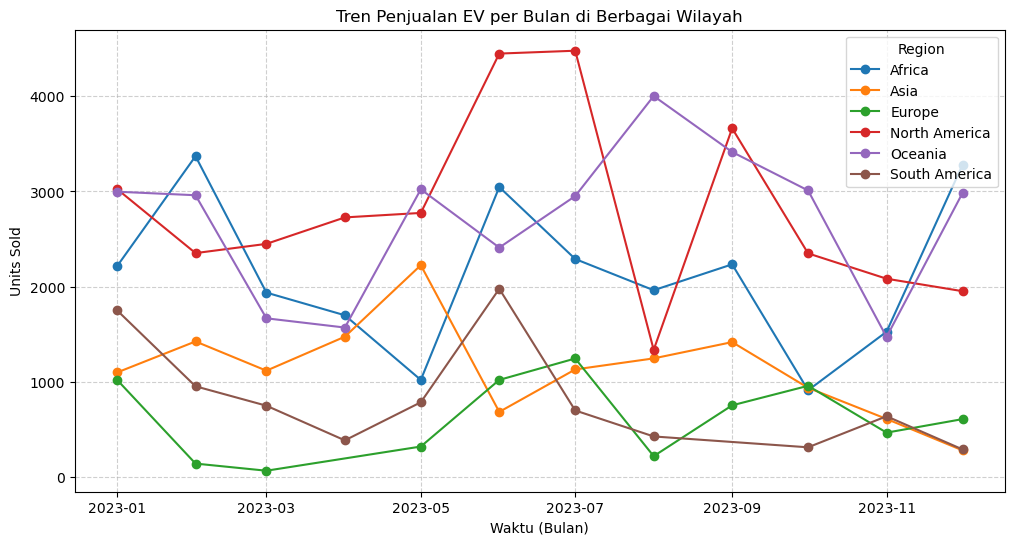

In [ ]:
# Menguabah kolom date menjadi DateTime
data['Date'] = pd.to_datetime(data['Date'])

# Melakukan agregasi data dari total penjualan per bulan dan per region
sales_trend = data.groupby(['Date', 'Region'])['Units_Sold'].sum().reset_index()

# Melakukan visualiasi
plt.figure(figsize=(12,6))
for region in sales_trend['Region'].unique():
    region_data = sales_trend[sales_trend['Region'] == region]
    plt.plot(region_data['Date'], region_data['Units_Sold'], marker='o', label=region)
plt.title("Tren Penjualan EV per Bulan di Berbagai Wilayah")
plt.xlabel("Waktu (Bulan)")
plt.ylabel("Units Sold")
plt.legend(title="Region")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Insight yang didapat dari grafik tersebut:  
- Garis merah (North America) dan garis ungu (Oceania) konsisten berada di atas wilayah lain, hal ini menunjukkan bahwa kedua wilayah tersebut merupakan pasar EV terbesar.  
- Garis hijau (Europe) selalu berada di bawah bahkan sempat mendekati 0 unit terjual pada bulan maret, hal ini menunjukkan penjualan EV di pasar Eropa sangat lambat dibanding wilayah lain.  
- Garus orange (Asia) dan garis biru (Afrika) berada di level menengah dengan tren cukup stabil tapi tidak setinggi North America dan Oceania, hal ini menunjukkan bahwa penjualan EV di wilayah ini ada namun pertumubuhannya belum signifikan.
- Garis coklat (South America) berada di bawah mendekati Europe dan garis ini cenderung menurun seiring waktu, hal ini menunjukkan minat EV di wilayah ini sangat rendah dibanding wilayah lain.

2. Bagaimana perbandingan jumlah unit terjual berdasarkan merek kendaraan listrik?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20244\3806664446.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')


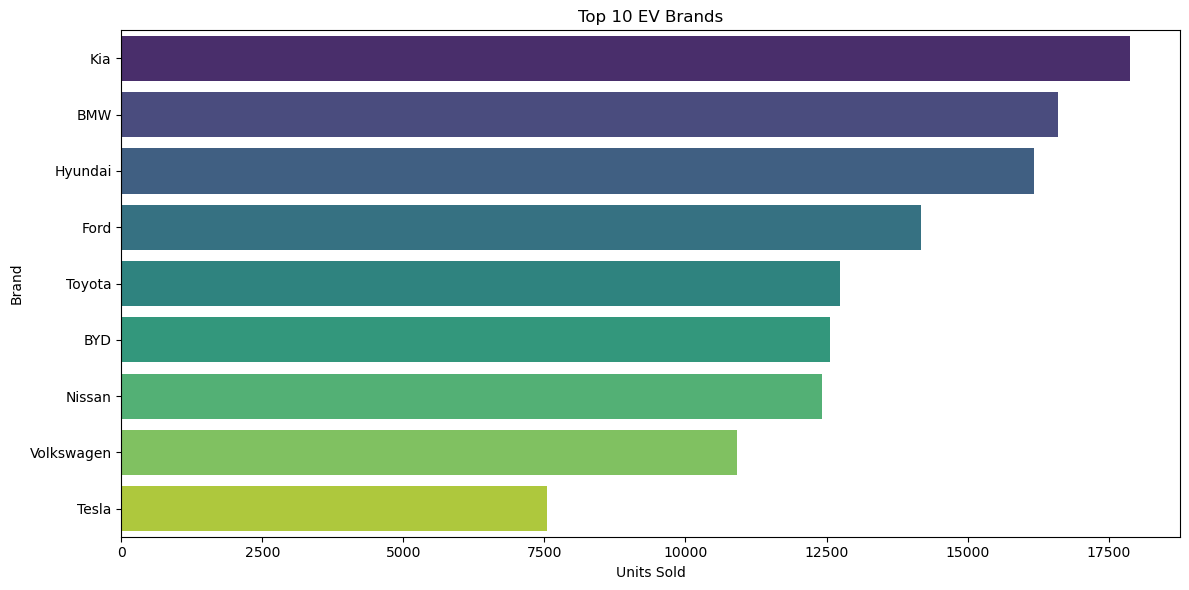

In [5]:
# melakukan agregasi total penjualan dari masing masing brand dengan menagmbil 10 brand teratas
top_brands = data.groupby('Brand')['Units_Sold'].sum().sort_values(ascending=False).head(10)

# Melakukan visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')
plt.title('Top 10 EV Brands')
plt.xlabel('Units Sold')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

Insight yang didapat dari grafik tersebut:  
- KIA menempati posisi pertamadengan penjualan tertinggi, hal ini menujukkan KIA memiliki pangsa pasar yang kuat dibanding merk lain
- BMW dan Hyundai menempati posisi 2 dan 3, kedua merk ini merupakan adopsi tinggi di segmen premium 
- Ford berada di posisi tengah, menandakan FORD masih cukup bersaing dengan brand Asia dan Eropa
- Toyota, BYD, Nissan memiliki jumlah penjualan mirip, hal ini berarti adanya persaingan ketat di level menengah
- Volkswagen dan Tesla berada di posisi bawah dengan hanya penjualan 7-11 ribu unit.

3. Bagaimana distribusi penjualan berdasarkan segmen pelanggan?

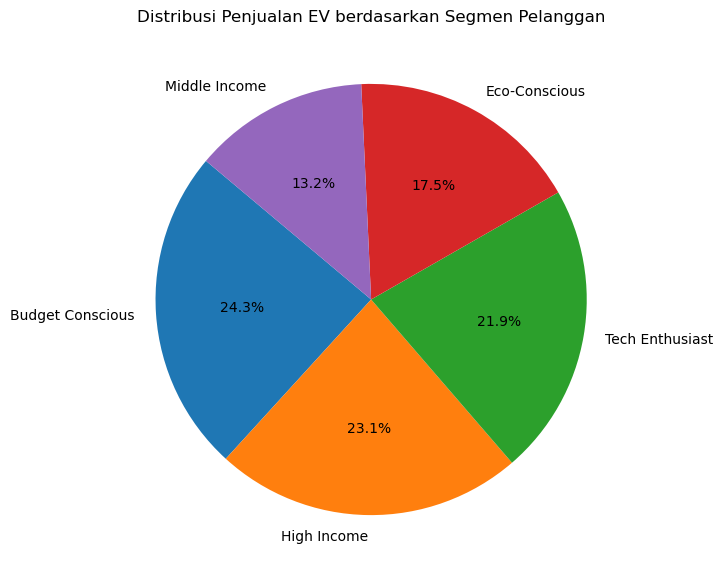

In [12]:
# Melakukan agregasi total Units_Sold per segmen pelanggan
segment_sales = (data.groupby("Customer_Segment")["Units_Sold"].sum().sort_values(ascending=False))

# Visualisasi
plt.figure(figsize=(7,7))
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribusi Penjualan EV berdasarkan Segmen Pelanggan")
plt.show()

Insight yang didapat dari pie chart tersebut:  
- Segmen budget conscious adalah yang terbesar, hal ini menunjukkan bahwa harga terjangkau menjadi faktor utama dalam pembelian kendaraan EV
- Segmen High income menyumbang 23.1%, hal ini menunjukkan bahwa EV juga menarik konsumen kelas atas yang mampu membeli kendaraan EV premium
- Segmen Tech Enthusiast berkontribusi 21.9%, hal ini menandakan bahwa konsumen yang menyukai teknologi canggih menjadi pendorong memiliki EV 
- Segmen Eco-Conscious sebesar 17.5%, hal ini menunjukkan terdapat konsumen yang membeli EV karena alasan lingkungan
- Segmen middle income paling rendah hanya 13.2%, hal ini menunjukkan bahwa EV masih dianggap mahal untuk kelas menengah. 

4. Apakah terdapat perbedaan adopsi kendaraan listrik pada wilayah dengan fast charging option dibandingkan wilayah tanpa fast charging?

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

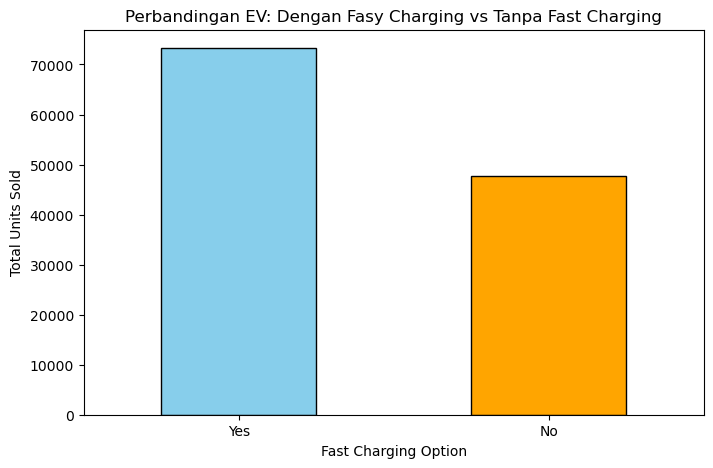

In [13]:
# Melakukan agregasi total penjualan berdasarkan fast_charging_option
fast_charging_sales = (data.groupby("Fast_Charging_Option")["Units_Sold"].sum().sort_values(ascending=False))

plt.figure(figsize=(8,5))
fast_charging_sales.plot(kind="bar", color=["skyblue", "orange"], edgecolor="black")
plt.title("Perbandingan EV: Dengan Fasy Charging vs Tanpa Fast Charging")
plt.xlabel("Fast Charging Option")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=0)


Insight yang didapat dari bar chart tersebut:  
- Penjualan EV dengan fast charging lebih dari 70rb unit dibanding tanpa fast charging hanya 45rb unit, hal ini menunjukan konsumen lebih tertarik membeli EV dengan fast charging
- Perbedaan yang mencapai 25rb unit menunjukkan bahwa kemampuan mengisi daya cepat adalah nilai tambah utama yang mempengaruhi keputusan pembelian 
- Konsumen cenderung memilih fast charging karena praktis untuk penggunaan sehari hari.

5.  Berapa nilai rata-rata, median, maksimum, dan minimum dari jumlah unit terjual dan pendapatan (revenue), serta bagaimana variasinya antar wilayah?

In [ ]:
# Menggunakan analisis Measure of Central Tendency dan Dispersion
# Menghitung statistik deskriptif untuk Units_Sold dan Revenue (keseluruhan)
overall_stats = (data[["Units_Sold", "Revenue"]].agg(["mean", "median", "min", "max"]).round(2))
print("Statistik Deskriptif Keseluruhan")
print(overall_stats)

# Menghitung variasi per wilayah
region_stats = (data.groupby("Region")[["Units_Sold", "Revenue"]].agg(["mean", "median", "min", "max"]).round(2))
print("Statistik Deskriptif per Wilayah")
print(region_stats)

Statistik Deskriptif Keseluruhan
        Units_Sold      Revenue
mean        227.88   4918761.81
median      234.00   4575344.00
min          50.00    817032.00
max         398.00  30162294.00
Statistik Deskriptif per Wilayah
              Units_Sold                     Revenue                      \
                    mean median min  max        mean     median      min   
Region                                                                     
Africa            229.62  236.0  56  398  5033137.98  5090478.0   958752   
Asia              216.54  217.0  52  385  4899965.16  4078700.0  1023120   
Europe            219.90  234.0  66  374  4439571.65  4570560.0  1276248   
North America     218.42  227.5  50  398  4711517.94  4213507.0   989550   
Oceania           238.65  257.5  57  398  5168998.38  5250771.0   864000   
South America     249.03  246.0  66  398  4952837.14  4439550.0   817032   

                         
                    max  
Region                   
Africa     

6. Apakah terdapat pengaruh signifikan diskon harga terhadap jumlah unit terjual kendaraan listrik?

In [ ]:
# Menggunakan uji t-test
# Membagi data menjadi dua kelompok ada diskon dan tidak ada diskon
with_discount = data[data["Discount_Percentage"] > 0]["Units_Sold"]
without_discount = data[data["Discount_Percentage"] == 0]["Units_Sold"]

# Lakukan uji t
t_stat, p_val = stats.ttest_ind(with_discount, without_discount, equal_var=False)
print("t-statistik:", t_stat)
print("p-value:", p_val)

# Interpretasi
# H0: Tidak ada perbedaan rata-rata penjualan antara kendaraan dengan diskon dan tanpa diskon
# H1: Ada perbedaan penjualan
if p_val < 0.05:
    print("Kesimpulan: Ada perbedaan signifikan penjualan antara EV dengan diskon dan tanpa diskon.")
else:
    print("Kesimpulan: Tidak ada perbedaan signifikan penjualan antara EV dengan diskon dan tanpa diskon.")


t-statistik: 0.8253756799443884
p-value: 0.41650096750561905
Kesimpulan: Tidak ada perbedaan signifikan penjualan antara EV dengan diskon dan tanpa diskon.


#### Pengambilan Kesimpulan

Berdasarkan hasil analisis keenam soal tersebut saya membuat beberapa rekomendasi untuk produsen dan pembuat kebijakan:
1. Memperkuat infrastruktur fast charging dan menekankan inovasi teknologi sebagai daya tarik utama.
2. Strategi pemasaran perlu menargetkan dua segmen pasar yaitu konsumen yang berdaya beli tinggi dan konsumen yang sensitif dengan harga
3. Memberi diskon harga bukan faktor utama sehingga sebaiknya diarahkan pada nilai tambah produk (fitur, teknologi, efisiensi baterai)